In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
df.shape

(891, 15)

In [44]:
# Drop unnecessary columns
df = df.drop(['who', 'class', 'deck', 'embark_town', 'alive', 'adult_male'], axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [45]:
df.shape

(891, 9)

In [46]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
alone         0
dtype: int64

In [47]:
df['age'] = df['age'].fillna(df.age.median())
df['embarked'] = df['embarked'].fillna(df.embarked.mode()[0])

In [ ]:
encoder = LabelEncoder()
column = ['sex', 'embarked', 'alone']

for col in column:
	df[col] = encoder.fit_transform(df[col])

df.head()

# male = 1, female = 0
# embarked : S = 0, C = 1, Q = 2
# alone = 0, not alone = 1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,2,1


In [49]:
df = df.dropna() # dropping extra NaN

In [50]:
X = df.drop('survived', axis=1)
y = df['survived']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
y_pred = rfc.predict(X_test)

In [54]:
print("accuracy score : ", accuracy_score(y_test, y_pred))
print("confusion matrix : \n", confusion_matrix(y_test, y_pred))
print("classification report : \n", classification_report(y_test, y_pred))

accuracy score :  0.8268156424581006
confusion matrix : 
 [[91 14]
 [17 57]]
classification report : 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
# Predict survival for a single passenger
sample = pd.DataFrame([{
    'pclass': 3,
    'sex': 1,  # male
    'age': 22,
    'sibsp': 1,
    'parch': 0,
    'fare': 7.25,
    'embarked': 2,  # S
    'alone': 1
},
{
    'pclass': 1,
    'sex': 0,  # female
    'age': 38,
    'sibsp': 1,
    'parch': 0,
    'fare': 71.2833,
    'embarked': 0,  # C
    'alone': 0
}])

print("Survival Prediction:", rfc.predict(sample)[0])
print("Survival Prediction:", rfc.predict(sample)[1])

#  0 = died, 1 = survived

Survival Prediction: 0
Survival Prediction: 1


In [63]:
print(sample)

   pclass  sex  age  sibsp  parch     fare  embarked  alone
0       3    1   22      1      0   7.2500         2      1
1       1    0   38      1      0  71.2833         0      0


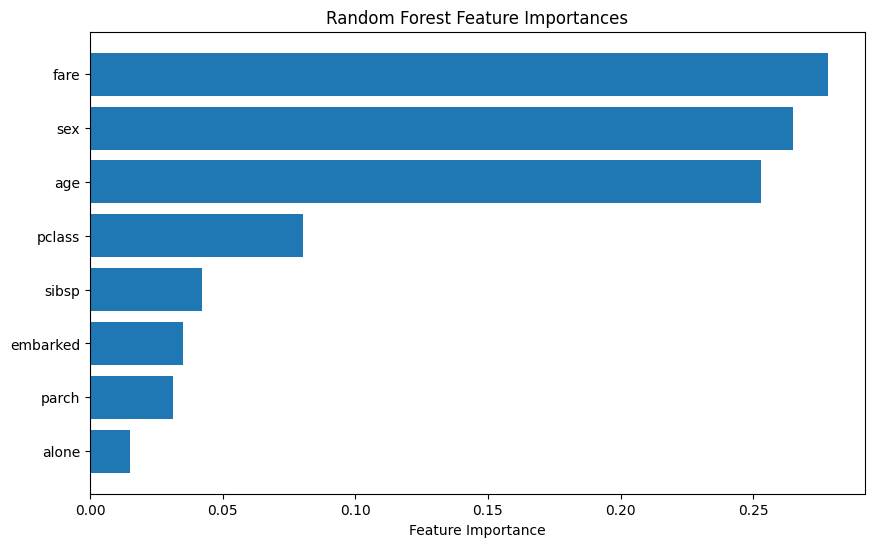

In [65]:
importances = rfc.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()


In [72]:
parameters = {
	'n_estimators': [100, 200, 300],
	'max_depth': [None, 5, 10, 15, 20],
	'min_samples_split': [2, 5, 7, 10, 12],
	'max_features': ['sqrt', 'log2']
}

In [73]:
grid_search = GridSearchCV(rfc, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [81]:
rfc

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [74]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}


In [75]:
improved_model = grid_search.best_estimator_
y_pred = improved_model.predict(X_test)
print("Improved Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Improved Score: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [76]:
print("Survival Prediction:", improved_model.predict(sample)[0])
print("Survival Prediction:", improved_model.predict(sample)[1])


Survival Prediction: 0
Survival Prediction: 1
